In [12]:
import os
current_directory = os.getcwd() # 현재 작업 디렉토리를 얻기
print("현재 작업 디렉토리:", current_directory)

현재 작업 디렉토리: c:\Users\jay_hook\myhub\miniproj


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#워닝 메시지
import warnings
warnings.filterwarnings('ignore')


import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)


In [14]:

# 파일 불러오기 
df = pd.read_csv("./scaled_data.csv", index_col=0)

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 0 to 173
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   경제심리지수(원계열)  174 non-null    float64
 1   뉴스심리지수       174 non-null    float64
 2   소비자심리지수      174 non-null    float64
 3   원자재구입가격실적    174 non-null    float64
 4   수출실적         174 non-null    float64
 5   달러결제수출비율     174 non-null    float64
 6   달러결제수입비율     174 non-null    float64
 7   달러결제순수입액     174 non-null    float64
 8   KO/US M2     174 non-null    float64
 9   BIRDIFF      174 non-null    float64
 10  TNDIFF       174 non-null    float64
dtypes: float64(11)
memory usage: 16.3 KB


<Axes: >

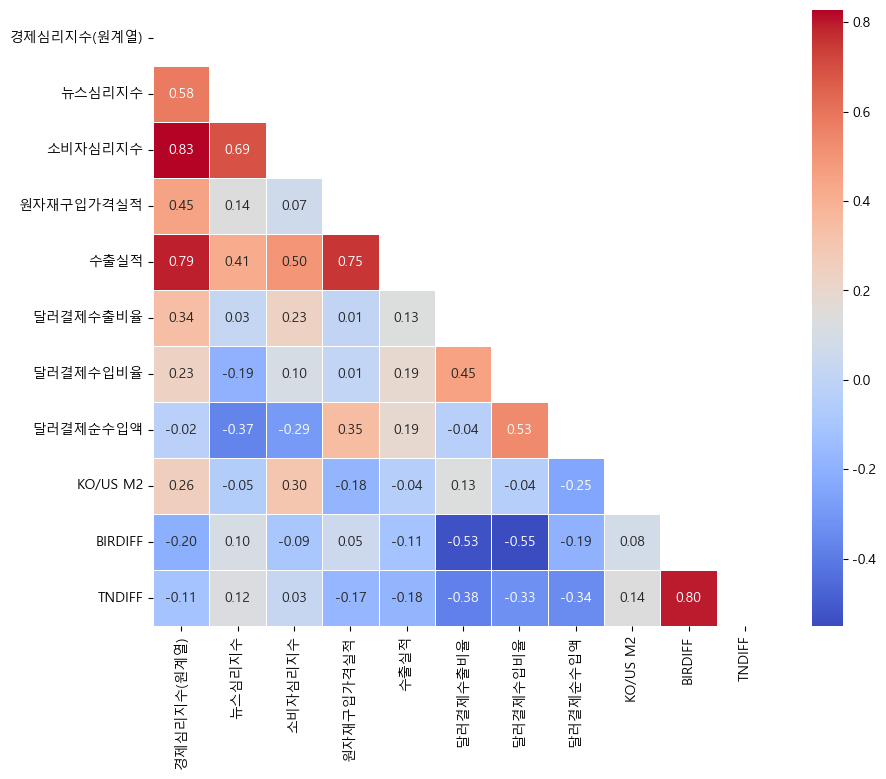

In [16]:
# 변수 다중공정성 보기  

corr_data = df[df.columns].corr()
plt.figure(figsize=(10, 8))

mask = np.triu(np.ones_like(corr_data, dtype=bool))

sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', mask=mask)

In [18]:
# 종속변수 인과관계 확인하기 
np.abs(corr_data.corr()['수출실적']).sort_values(ascending=False)

수출실적           1.000000
경제심리지수(원계열)    0.846620
원자재구입가격실적      0.833166
TNDIFF         0.545136
소비자심리지수        0.543454
뉴스심리지수         0.492104
BIRDIFF        0.436241
KO/US M2       0.303244
달러결제수출비율       0.259264
달러결제수입비율       0.213418
달러결제순수입액       0.191754
Name: 수출실적, dtype: float64

In [ ]:
df.columns

Index(['날짜', '달러원종가', '달러원시가', '위안화원_시', '유로달러_시', '코스피시가', '유로인덱스_시', '달러엔_시',
       '달러위안화_시', 'CD91', 'WTI', '달러인덱스', '콜금리', 'BIR', '엔원_시'],
      dtype='object')

In [ ]:
# VIF 확인하기 

X = df.drop(['엔원_시','유로인덱스_시','달러원종가','달러원시가','코스피시가', 'CD91', '달러인덱스','BIR' ], axis=1)

# statsmodels의 상수항을 추가하기 위해 X에 상수 열 추가
X = sm.add_constant(X)

# VIF 계산
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 결과 출력
vif.sort_values('VIF Factor',ascending=False)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# OLS 정보 보기 
X = df[['위안화원_시', '유로달러_시', 'WTI','달러위안화_시','콜금리','달러엔_시']]
y = df[['달러원종가']]
feature_add = sm.add_constant(X, has_constant='add')
# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  달러원종가   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 1.659e+04
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        08:24:50   Log-Likelihood:                -13250.
No. Observations:                3318   AIC:                         2.651e+04
Df Residuals:                    3311   BIC:                         2.656e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1022.6544     15.418    -66.329      0.000   -1052.884    -992.425
위안화원_시         6.0405      0.039    156.734      0.000       5.965       6.116
유로달러_시       -25.6926      4.861     -5.285      0.000     -35.224     -16.161
WTI            0.0825      0.016      5.026      0.000       0.050       0.115
달러위안화_시      170.3749      1.006    169.369      0.000     168.403     172.347
콜금리            2.9604      0.381      7.767      0.000       2.213       3.708
달러엔_시          0.1420      0.024      5.828      0.000       0.094       0.190
==============================================================================
Omnibus:                     9024.684   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        338628728.563
Skew:                          32.862   Prob(JB):                         0.00
Kurtosis:                    1566.673   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: >

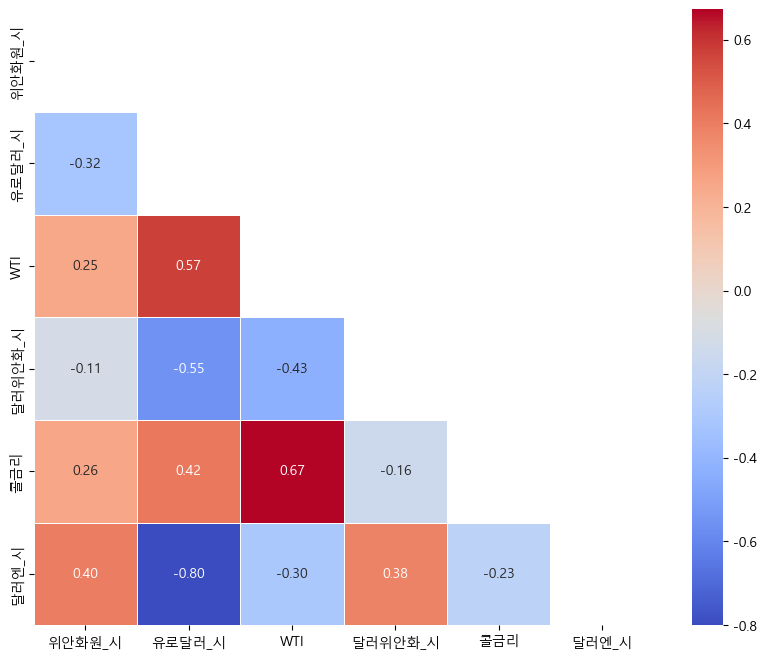

In [ ]:
# 선택변수 히트맵 보기 
corr_data = df[['위안화원_시', '유로달러_시', 'WTI','달러위안화_시','콜금리','달러엔_시']].corr()
plt.figure(figsize=(10, 8))

mask = np.triu(np.ones_like(corr_data, dtype=bool))

sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', mask=mask)


IndexError: index 6 is out of bounds for axis 0 with size 6

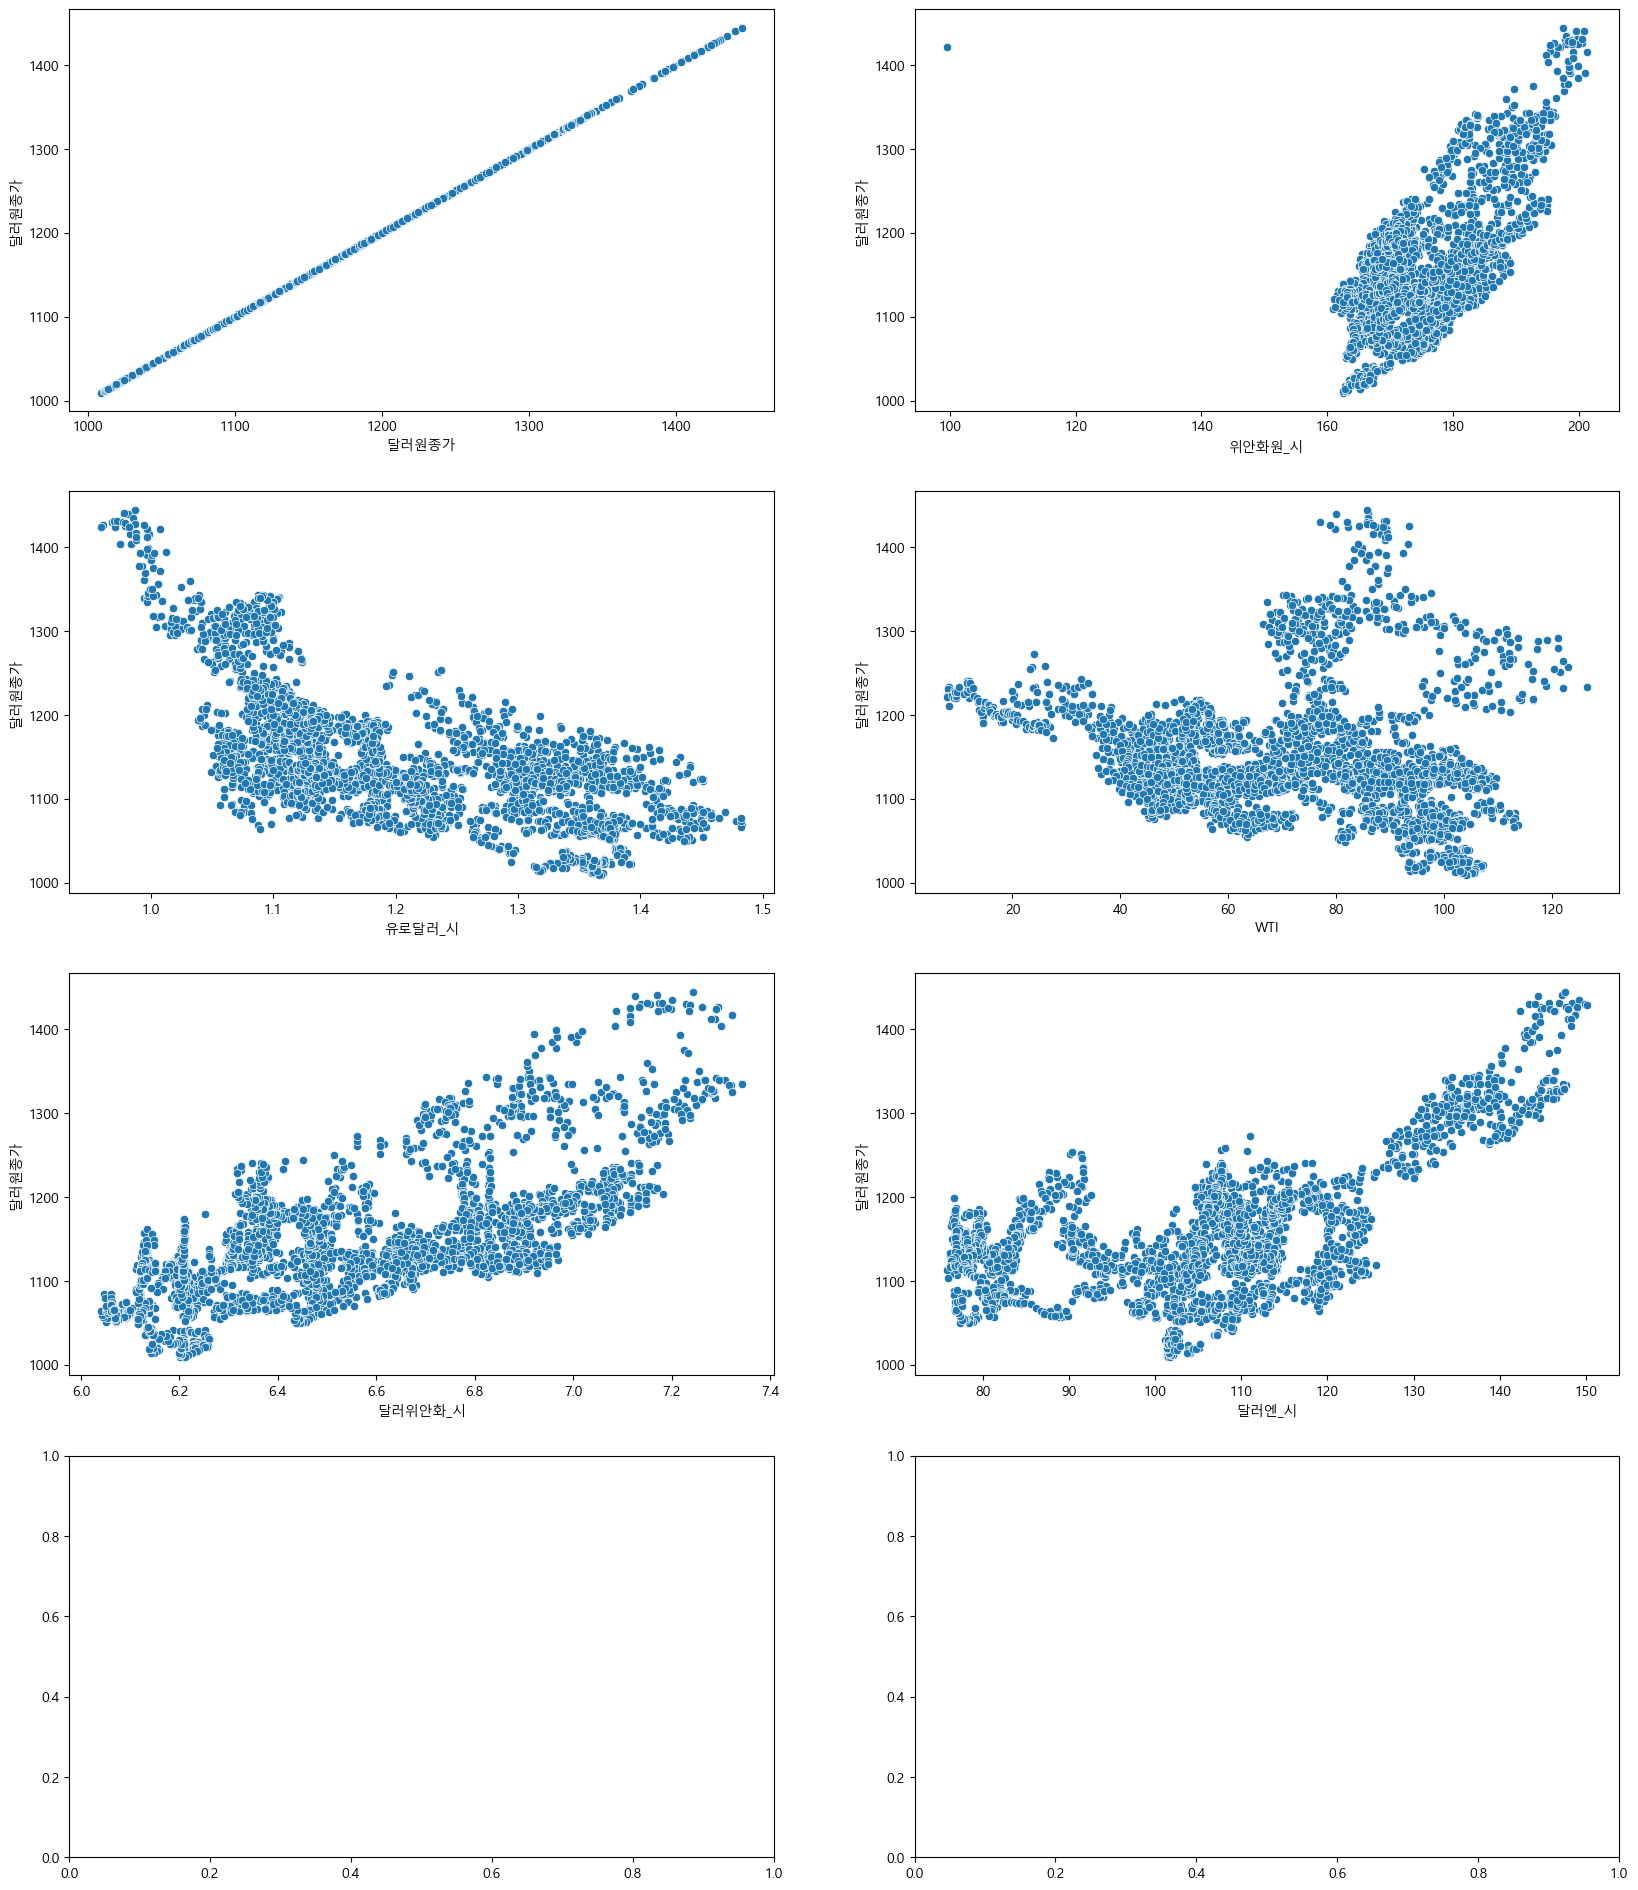

In [ ]:
# 데이터 분포 확인 - 산점도 

import matplotlib.pyplot as plt
import seaborn as sns

# '달러원종가'를 포함한 원하는 특성을 선택합니다.
df1 = df[['달러원종가','위안화원_시', '유로달러_시', 'WTI','달러위안화_시','달러엔_시']]
# 위 특성들을 사용하여 산점도를 그립니다.
nrows = 4
ncols = 2

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(20, 24)

for i in range(nrows):
    for j in range(ncols):
        num = i * ncols + j
        sns.scatterplot(
            x=df1.columns[num],
            y=df1['달러원종가'],
            data=df1,
            ax=axs[i][j]
        )

plt.show()



# 위 특성들을 사용하여 산점도를 그립니다.
nrows = 4
ncols = 2

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(20, 24)

for i in range(nrows):
    for j in range(ncols):
        num = i * ncols + j
        sns.scatterplot(
            x=df1.columns[num],
            y=df1['달러원종가'],
            data=df1,
            ax=axs[i][j]
        )

plt.show()



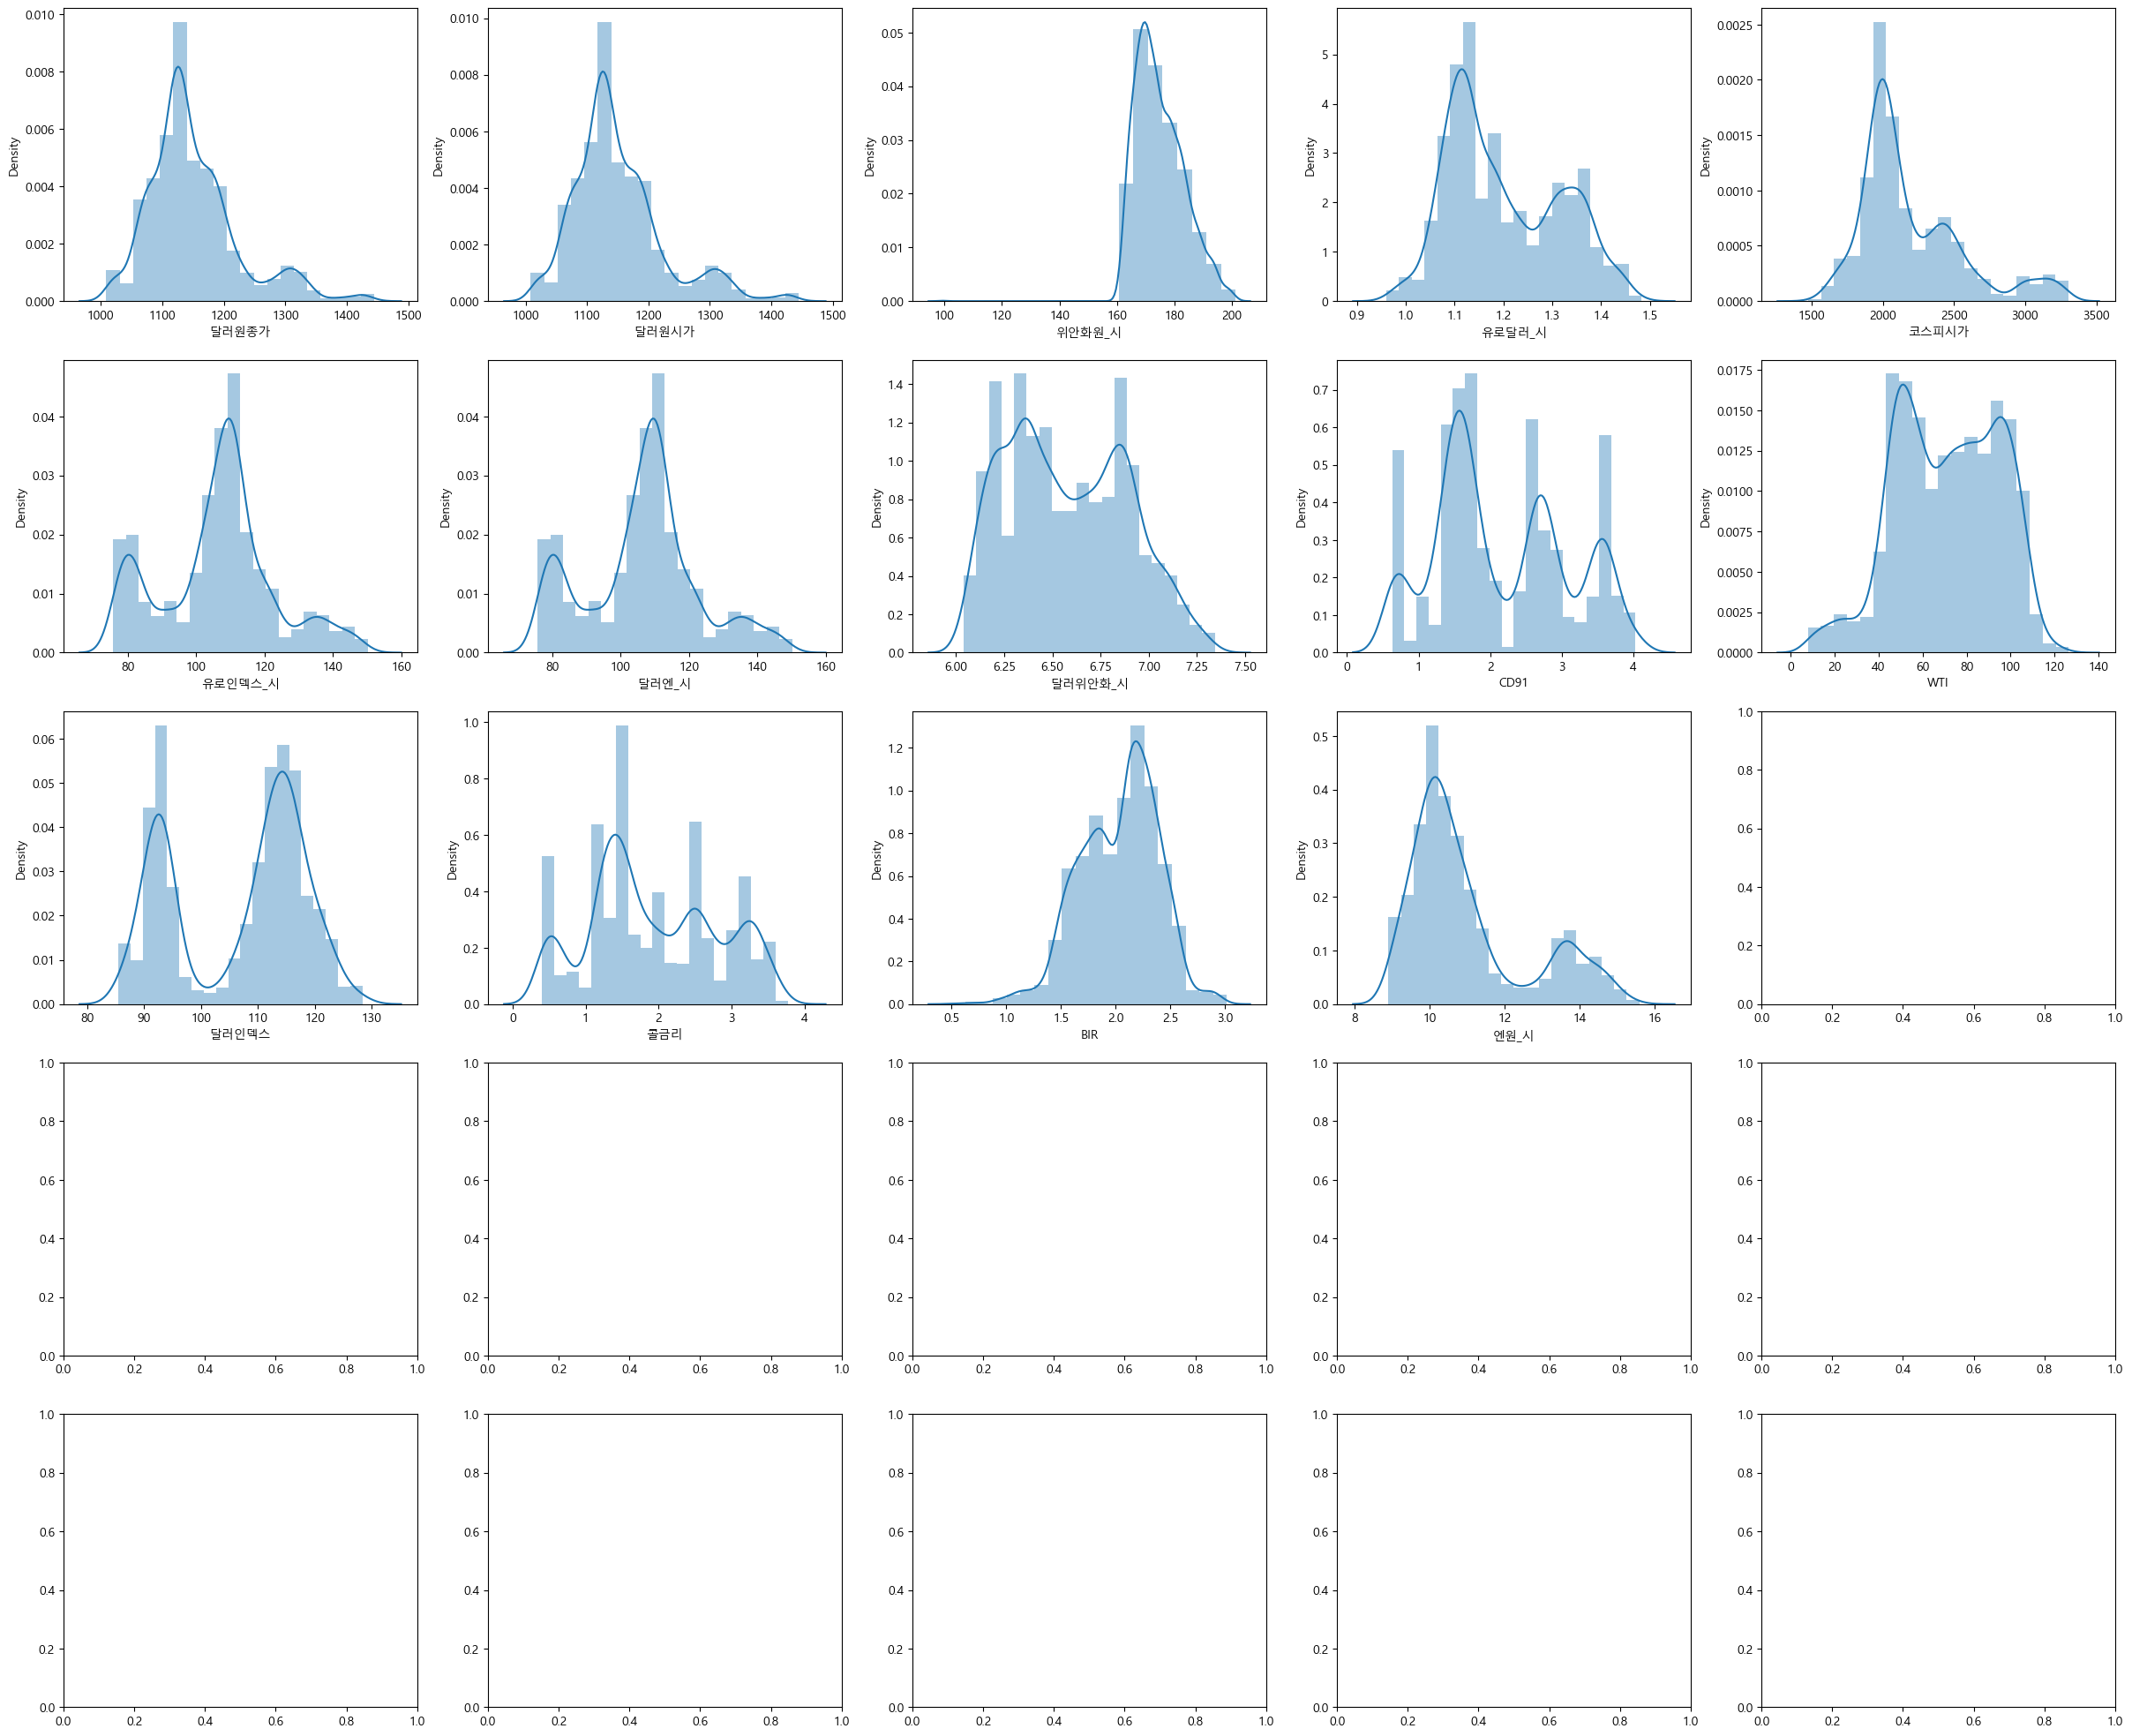

In [ ]:
## histogram
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(df.columns):
    sns.distplot(df[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])

In [ ]:
## 독립변수 선택 복습 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df=pd.read_csv('../해커톤/Woo_data_3.csv',encoding='euc-kr',index_col=0)
X=df.drop(['달러원종가','달러원시가'], axis=1)
y=df[['달러원종가']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False,random_state=42)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()

RFE = RFE(model, n_features_to_select=5)
X_train_RFE = RFE.fit_transform(X_train,y_train)
X_test_RFE = RFE.transform(X_test)

In [ ]:
X_train_RFE

array([[170.51  ,   1.4325,   6.8297,   2.88  ,   2.38  ],
       [168.56  ,   1.4409,   6.8283,   2.88  ,   2.34  ],
       [167.02  ,   1.4364,   6.8277,   2.88  ,   2.37  ],
       ...,
       [171.06  ,   1.1079,   7.0893,   1.49  ,   1.54  ],
       [170.98  ,   1.1145,   7.1359,   1.49  ,   1.54  ],
       [169.6   ,   1.1103,   7.1434,   1.49  ,   1.55  ]])

In [ ]:
RFE.n_features_in_

12

In [ ]:
RFE.feature_names_in_

array(['위안화원_시', '유로달러_시', '코스피시가', '유로인덱스_시', '달러엔_시', '달러위안화_시', 'CD91',
       'WTI', '달러인덱스', '콜금리', 'BIR', '엔원_시'], dtype=object)

In [ ]:
RFE.ranking_

array([1, 1, 8, 6, 4, 1, 1, 7, 5, 2, 1, 3])

In [ ]:
RFE.ranking_ ==1

array([ True,  True, False, False, False,  True,  True, False, False,
       False,  True, False])

In [ ]:
RFE.feature_names_in_[RFE.ranking_ ==1]   

array(['위안화원_시', '유로달러_시', '달러위안화_시', 'CD91', 'BIR'], dtype=object)

In [ ]:
## Filter 
from sklearn.feature_selection import f_regression, SelectKBest
## selctor 정의하기.
selector = SelectKBest(score_func=f_regression, k=5)
## 학습데이터에 fit_transform 
X_train_selected = selector.fit_transform(X_train, y_train)
## 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)
X_train_selected.shape, X_test_selected.shape

((2322, 5), (996, 5))

In [ ]:
selector.feature_names_in_

array(['위안화원_시', '유로달러_시', '코스피시가', '유로인덱스_시', '달러엔_시', '달러위안화_시', 'CD91',
       'WTI', '달러인덱스', '콜금리', 'BIR', '엔원_시'], dtype=object)

In [ ]:
selector.get_support()

array([ True,  True, False, False, False,  True, False,  True, False,
       False,  True, False])

In [ ]:
selected_mask =selector.get_support()
selected_names = X.columns[selected_mask]
unselected_names = X.columns[~selected_mask]

print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['위안화원_시', '유로달러_시', '달러위안화_시', 'WTI', 'BIR'], dtype='object')
Unselected names:  Index(['코스피시가', '유로인덱스_시', '달러엔_시', 'CD91', '달러인덱스', '콜금리', '엔원_시'], dtype='object')


In [ ]:
## Embedded
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(estimator=RandomForestRegressor(), threshold=0.1).fit(X_train, y_train)
rf = selector.get_support()
count = np.count_nonzero(rf)
count


2

In [ ]:
selector.get_support()

array([ True, False, False, False, False,  True, False, False, False,
       False, False, False])

In [ ]:
selected_mask2=selector.get_support()

In [ ]:
selected_names = X.columns[selected_mask2]
unselected_names = X.columns[~selected_mask2]

print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['위안화원_시', '달러위안화_시'], dtype='object')
Unselected names:  Index(['유로달러_시', '코스피시가', '유로인덱스_시', '달러엔_시', 'CD91', 'WTI', '달러인덱스', '콜금리',
       'BIR', '엔원_시'],
      dtype='object')


In [ ]:
# Ridge 해보기 

X = df[['위안화원_시', '유로달러_시', 'WTI','달러위안화_시','달러엔_시','콜금리']]
y= df[['달러원종가']]

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 파이프라인 생성
pipeline = Pipeline([
    ('mm_scaler', MinMaxScaler()),  # 표준화
    ('ridge_reg', Ridge(alpha=1, solver="cholesky"))  # Ridge 회귀 모델
])

# 파이프라인 학습
pipeline.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = pipeline.predict(X_test) 
# 모델이 있어서 predict 한것 
# 스켈링만 있으면 trasform 한것 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'r2_score: {score:.2f}')



Mean Squared Error: 480.61
Root Mean Squared Error: 21.92
r2_score: 0.91


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['유로달러_시', 'WTI','달러위안화_시','달러엔_시','콜금리']]
y= df[['달러원종가']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False,random_state=42) 


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

sclaer = MinMaxScaler()
lgb=LGBMRegressor()

pipe = Pipeline([
    ('scaler',sclaer),
    ('model', lgb)
])

param = {
    'model__max_depth': [2,3,5],
    'model__learning_rate' : [0.1,0.01]
}

grid = GridSearchCV(estimator=pipe, param_grid=param, cv=3)
grid.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1095
[LightGBM] [Info] Number of data points in the train set: 1769, number of used features: 5
[LightGBM] [Info] Start training from score 1128.939010
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', LGBMRegressor())]),
             param_grid={'model__learning_rate': [0.1, 0.01],
                         'model__max_depth': [2, 3, 5]})

In [ ]:

grid.best_params_

{'model__learning_rate': 0.01, 'model__max_depth': 2}

In [ ]:
y_pred=grid.predict(X_test)

In [ ]:
y_pred

array([1127.60277872, 1127.60277872, 1124.75673068, 1123.92516903,
       1123.92516903, 1122.63909076, 1123.92516903, 1122.63909076,
       1123.92516903, 1123.92516903, 1122.63909076, 1123.92516903,
       1122.63909076, 1123.92516903, 1123.92516903, 1123.92516903,
       1123.92516903, 1123.92516903, 1123.92516903, 1122.63909076,
       1122.63909076, 1122.63909076, 1122.63909076, 1122.63909076,
       1122.63909076, 1122.63909076, 1122.63909076, 1122.63909076,
       1122.63909076, 1122.63909076, 1122.63909076, 1122.63909076,
       1122.63909076, 1122.63909076, 1122.63909076, 1122.63909076,
       1122.63909076, 1122.63909076, 1122.63909076, 1122.63909076,
       1122.63909076, 1122.63909076, 1122.63909076, 1122.63909076,
       1122.63909076, 1122.63909076, 1122.63909076, 1122.63909076,
       1122.63909076, 1122.63909076, 1122.63909076, 1122.63909076,
       1122.63909076, 1122.63909076, 1122.63909076, 1122.63909076,
       1122.63909076, 1122.63909076, 1122.63909076, 1122.63909

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_pred,y_test)


print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'r2_score:{score:.2f}')

Mean Squared Error: 17073.02
Root Mean Squared Error: 130.66
r2_score:-149.87
